In [1]:
import pandas as pd
import glob
import os
from functools import reduce

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# change into the directory where the Testing and Training data are located
wd = os.path.abspath("TrainTestingData")

# read all files into an dataframe and save dataframes to the df_list
training_set = wd + "/training_set_with_features.csv"
testing_set = wd + "/testing_set_with_features.csv"
df_train2 = pd.read_csv(training_set)
df_test2 = pd.read_csv(testing_set)
df_train2

Due to the fact that the "DATE" column's format in different feature csv data being different from different online sources, the above merge would not be able to happen properly, resulting the dataframe to only have the merged column names but no tuple data rows.

In [3]:
# Thus, the following is a new way of joining our data into one single dataframe object.
# Find all names of our data files in csv format (all csv data has the format of 2 columns, 1st column being DATE, 
# Second column being the feature we believe that is important for our model). In order to merge all these seperate
# featrue values into a single csv (pandas DataFrame) file for futher data cleaning and processing before the modeling,
# phase, we loop through all the file names (saved into a list) and reading them into the pandas DataFrame one at a 
# time while joining them based on the "DATE" column.

# Initialize an empty DataFrame object to build up into a complete dataframe with all needed features through merging other feature dataframes
df = pd.DataFrame()
# locate the directory path where the data are located on the local machine
wd = os.path.abspath('FeatureData')
# find all the data in csv format under the located directory and save them as a list variable
all_files = glob.glob(wd + '/*.csv')
# Open all the csv feature data as a Pandas DataFrame and saving it inside a list variable
df_list = [pd.read_csv(file) for file in all_files]
# Expand the initialized DataFrame by assigning it the second column of all the feature data file as a new column
# omitting the DATE column to avoid problems caused by different DATE format
for fileIndex in range(len(df_list)):
    df[df_list[fileIndex].columns[1]] = df_list[fileIndex][df_list[fileIndex].columns[1]]
# Add the DATE column into the expanded dataframe with the correct format (the same as our training and testing dataset)
##### Continued on the next few cells #####

df.head(5)



,ASPNHSUS,UNRATE,USACPIHOUMINMEI,FEDFUNDS,CSUSHPINSA,MSPNHSUS,MSACSR,MORTGAGE30US,NHFSEPUC,NHSDPC,NHSDPNS,HNFSEPUSSA,HSN1F,DSPIC96,TOTALSA
0,144200.0,7.3,59.963759,4.03,75.697,120000.0,5.2,8.4320,131.0,16.0,17.0,281.0,676.0,6616.3,12.6
1,144800.0,7.4,60.195578,4.06,75.652,117200.0,4.9,8.7625,129.0,16.0,20.0,269.0,639.0,6649.9,12.9
2,144800.0,7.4,60.466033,3.98,75.812,120000.0,6.1,8.9350,135.0,16.0,20.0,279.0,553.0,6659.6,12.8
3,145000.0,7.4,60.388760,3.73,76.079,120000.0,6.1,8.8525,134.0,14.0,17.0,274.0,546.0,6679.4,12.6
4,146000.0,7.6,60.350123,3.82,76.398,113000.0,6.0,8.6720,135.0,16.0,18.0,273.0,554.0,6712.9,13.1


In [4]:
# The format of DATES in the training and testing data sets provided by synchrony FINANCIAL are in the for of:
#                                                  '01/month/year'
# As all other feature data are found with a corresponding DATE with Month being from January (01) ~ December (12)
# and Year from 1992 (92) ~ 2017 (17) and with the first day of the month (01).
# Thus, the next step is to create a pandas Series object representing the DATE in the corresponding string format

# create the month list with strings representing 1 ~ 12 with a '0' prefix
month = ['0%d' % s for s in range(1,13) ]
# create a new list with the substring constructed by the last two characters in the string to fit the month string 
# representation in the testin and training data sets and we are done for the month
months = [m[-2:] for m in month]
months

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [5]:
# As above with the month, we do the similar process with the year.
# create a list of string representation of the year with range from 1992 ~ 2017
year = [str(y) for y in range(1992, 2018)]
# create the years list with the correct format of the year's strings by saving all the year element's substring 
# constructed by the last two characters of the string
years = [y[-2:] for y in year]

In [6]:
# Create the DATE list with the same string formats as the training and testing data set
# by looping through the months and years list 
DATE = ['01/%s/%s' % (month, year) for year in years for month in months]
# Turn the list into a Pandas Series Object so we can join it with the main dataframe
DATE = pd.Series(DATE)
# Join the DATE Series with the main dataframe, so the dataframe would have the "DATE" column
df["DATE"] = DATE

In [7]:
df.tail()

,ASPNHSUS,UNRATE,USACPIHOUMINMEI,FEDFUNDS,CSUSHPINSA,MSPNHSUS,MSACSR,MORTGAGE30US,NHFSEPUC,NHSDPC,NHSDPNS,HNFSEPUSSA,HSN1F,DSPIC96,TOTALSA,DATE
307,369200.0,4.4,120.448724,1.16,194.684,314200.0,6.0,3.880,176.0,16.0,13.0,280.0,559.0,12785.4,16.4,01/08/17
308,379300.0,4.2,120.728451,1.15,195.155,331500.0,5.3,3.805,175.0,17.0,14.0,280.0,639.0,12786.9,18.9,01/09/17
309,394000.0,4.1,121.139930,1.15,195.430,319500.0,5.6,3.895,176.0,18.0,13.0,286.0,616.0,12805.3,18.4,01/10/17
310,388500.0,4.1,121.279407,1.16,195.815,343400.0,4.8,3.922,181.0,17.0,16.0,287.0,711.0,12814.8,17.9,01/11/17
311,398700.0,4.1,121.604340,1.30,196.216,340100.0,5.4,3.950,176.0,19.0,13.0,295.0,653.0,12846.3,18.2,01/12/17


Working with feature data collected in a seasonal matter

In [8]:
# We have a few features which are recorded in a seasonal style, thus we will expand them so that the data for each
# sesaon would be the same for each months in that season.

In [9]:
# In order to work with the Seasonal Data, need to change it into monthly presentation (Each tuple data times three)
# We solve it by replicating each row of data 3 times and saving these replicated data into a new list
# then transform the list into a pandas Series. This would expand the seasonal data into monthly data.
# then we simply join this series into the main dataframe as a new column

# change into the directory where the seasonal Data featrues csv data files are located
wd = os.path.abspath("Seasonal Data to be changed")
# save all the csv files in the files_list
files_list = glob.glob( wd + '/*.csv')
# read all files into an dataframe and save dataframes to the df_list
df_list = [pd.read_csv(file) for file in files_list]
# create the data_list where we will put the monthly data expanded by the seasonal data in
data_list = []
# loop through each of the pandas dataframe to access the feature data Series (all based on the column with index 1)
for i in range(len(df_list)):
    seasonal_data_series = df_list[i][df_list[i].columns[1]]
    # for the data values in these data seriesexpand each of them (appending) 3 times into the data_list
    for data in seasonal_data_series:
        for expand in range(3):
            data_list.append(data)
    # create a pandas Series from the data_list
    new_data_series = pd.Series(data_list)
    # Add the new pandas series into the main dataframe as a new column
    df[df_list[i].columns[1]] = new_data_series


In [10]:
# save the dataframe from memory to local disk as "AllFeaturesData.csv"
df.to_csv("AllFeaturesData.csv", index = False)

In [11]:
# read in the csv file we which we used OpenRefine to change all string representation of numbers to numeric data
df = pd.read_csv("AllFeaturesData-csv.csv")

In [12]:
# change into the directory where the Testing and Training data are located
wd = os.path.abspath("TrainTestingData")
# save all the csv files in the files_list
files_list = glob.glob( wd + '/*.xlsm')
# read all files into an dataframe and save dataframes to the df_list
files_list[1] # Training dataset
files_list[0] # Testing Dataset
df_train = pd.read_excel(files_list[1])
df_test = pd.read_excel(files_list[0])
df_main = pd.DataFrame()
df_main = df_main.append(df_train)
df_main = df_main.append(df_test)
df_main = df_main.reset_index() # reindex to to get rid of duplicated index so we can merge the needed feature column to the main dataframe




In [13]:
df[df_main.columns[2]] = df_main[df_main.columns[2]]
map(int,df[df_main.columns[2]])

In [14]:
df.to_csv("AllFeaturesData-csv.csv", index = False)

In [15]:
df_test = df[-12 * (2017-2015):]

In [16]:
df[:-12 * (2017-2015)].tail()
df_train = df[:-12 * (2017-2015)]
df_train.head()


,ASPNHSUS,UNRATE,USACPIHOUMINMEI,FEDFUNDS,CSUSHPINSA,MSPNHSUS,MSACSR,MORTGAGE30US,NHFSEPUC,NHSDPC,NHSDPNS,HNFSEPUSSA,HSN1F,DSPIC96,TOTALSA,DATE,DIFSRC1Q027SBEA,W774RC1Q027SBEA,Sales in $MM
0,144200.0,7.3,59.963759,4.03,75.697,120000.0,5.2,8.4320,131.0,16.0,17.0,281.0,676.0,6616.3,12.6,01/01/92,287.353,287.353,10845
1,144800.0,7.4,60.195578,4.06,75.652,117200.0,4.9,8.7625,129.0,16.0,20.0,269.0,639.0,6649.9,12.9,01/02/92,287.353,287.353,10904
2,144800.0,7.4,60.466033,3.98,75.812,120000.0,6.1,8.9350,135.0,16.0,20.0,279.0,553.0,6659.6,12.8,01/03/92,287.353,287.353,10986
3,145000.0,7.4,60.388760,3.73,76.079,120000.0,6.1,8.8525,134.0,14.0,17.0,274.0,546.0,6679.4,12.6,01/04/92,291.349,291.349,10738
4,146000.0,7.6,60.350123,3.82,76.398,113000.0,6.0,8.6720,135.0,16.0,18.0,273.0,554.0,6712.9,13.1,01/05/92,291.349,291.349,10777


In [23]:
#normalize train
try:
    del df_test["DATE"]
    del df_train["DATE"]
except:
    print("Already deleted the 'DATE'column in both df_test and df_train dataframes")
#normalize the training sets to test the original model whih was giving a huge scale
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#generalization technique to put all pandas to more acceptable range so that all columns are in the similar range

train_scaled_parse = min_max_scaler.fit_transform(df_train)
#fit the model based on scale
train_scaled = pd.DataFrame(train_scaled_parse)#create dataframe
train_scaled
X,y=train_scaled.drop([17], axis=1), train_scaled[17]#separate features and target variable
#X_test,y_test = df_test.drop(['Sales in $MM'], axis=1), df_test['Sales in $MM']

Already deleted the 'DATE'column in both df_test and df_train dataframes


In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()#repeating the same procedure for testing set

test_scaled_parse = min_max_scaler.fit_transform(df_test)
test_scaled = pd.DataFrame(test_scaled_parse)
test_scaled

X_test,y_test = test_scaled.drop([17], axis=1), test_scaled[17]

In [25]:
X.head()#to examine whether the variables are in shape
y.head()
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.342105,0.888889,0.000000,0.000000,0.000000,0.000000,0.666667,0.573394,0.000000,0.000000,0.272727,0.000000,0.000000,0.028217,0.68,0.000000,0.000000
1,0.000000,0.888889,0.050399,0.041667,0.011624,0.316364,0.666667,0.294889,0.023810,0.333333,0.363636,0.051724,0.026178,0.000000,0.64,0.000000,0.000000
2,0.303509,1.000000,0.091952,0.020833,0.074299,0.269091,0.666667,0.339450,0.095238,0.333333,0.636364,0.103448,0.068063,0.095664,0.32,0.000000,0.000000
3,0.484211,1.000000,0.127025,0.031250,0.164018,0.543636,0.400000,0.222805,0.142857,0.555556,0.545455,0.068966,0.240838,0.193393,0.60,0.103853,0.103853
4,0.140351,0.666667,0.185755,0.031250,0.252218,0.123636,0.466667,0.216252,0.119048,0.555556,0.818182,0.068966,0.209424,0.244666,0.48,0.103853,0.103853


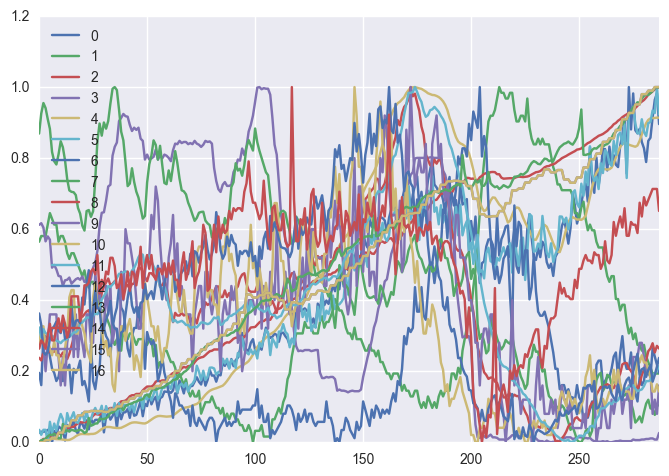

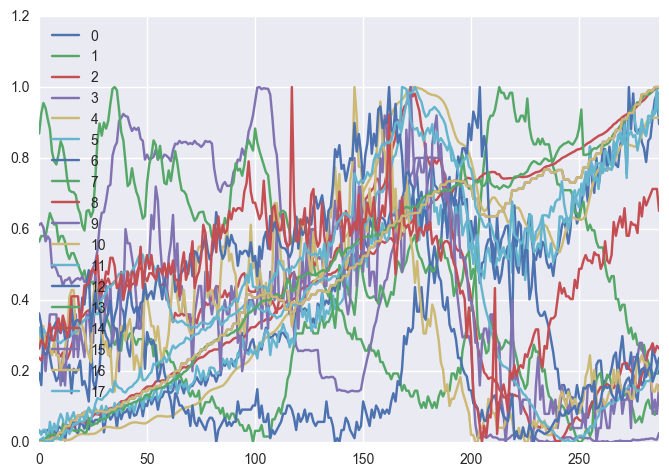

In [26]:
X.plot()#to observe the trend for each variable
train_scaled.plot()#to observe the interaction between target variable and x

In [27]:
from sklearn import preprocessing
clf= svm.SVR()#to train the model using SVM because of the linear trend
#lab_enc = preprocessing.LabelEncoder()
clf.fit(X, y)#fitting the algorithm using the training model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
acc_SvmSvr =round(clf.score(X_test, y_test)*100,2)
print(str(acc_SvmSvr)+'percent')
#using the test variables, to predict the target and compare it with the test y

79.9percent
